In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
replace dogs_vs_cats/test/cats/cat.10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#import neccessary module
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Create CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
#compiling
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#training
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 58s 89ms/step - loss: 0.5855 - accuracy: 0.6859 - val_loss: 0.5337 - val_accuracy: 0.7212
Epoch 2/10
625/625 [==============================] - 52s 83ms/step - loss: 0.4567 - accuracy: 0.7810 - val_loss: 0.4311 - val_accuracy: 0.7954
Epoch 3/10
625/625 [==============================] - 53s 83ms/step - loss: 0.3594 - accuracy: 0.8401 - val_loss: 0.4637 - val_accuracy: 0.8060
Epoch 4/10
625/625 [==============================] - 56s 90ms/step - loss: 0.2406 - accuracy: 0.8979 - val_loss: 0.6737 - val_accuracy: 0.7900
Epoch 5/10
625/625 [==============================] - 53s 84ms/step - loss: 0.1374 - accuracy: 0.9457 - val_loss: 0.9334 - val_accuracy: 0.7666
Epoch 6/10
625/625 [==============================] - 53s 84ms/step - loss: 0.0909 - accuracy: 0.9663 - val_loss: 0.9542 - val_accuracy: 0.7768
Epoch 7/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0589 - accuracy: 0.9789 - val_loss: 1.2872 - val_accuracy:

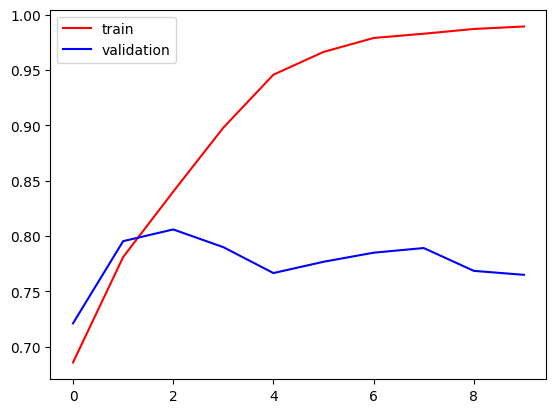

In [ ]:
#ploting the graph

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

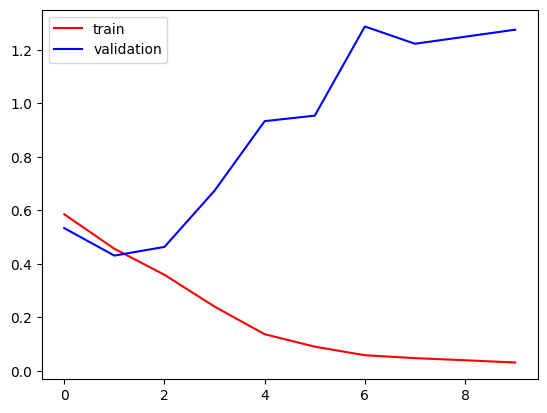

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img1 = cv2.imread('/content/sample.jpg')

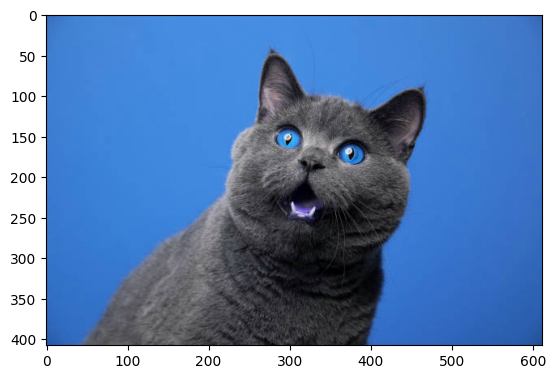

In [ ]:
plt.imshow(test_img1)

In [ ]:
test_img1 = cv2.resize(test_img1,(256,256))

In [ ]:
test_iNPut = test_img1.reshape((1,256,256,3))

In [ ]:
model.predict(test_iNPut)

1/1 [==============================] - 0s 80ms/step


array([[1.]], dtype=float32)